# Project: TMDB movie Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. 
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Questions for Analysis
I am acting as an investor who want to invest his money in movie production. I want to know some features about the movie I want to produce. This information I will put some questions: 
1. Do people prefer long or short movies? 
2. Is it true that a movie costs more gets more money and do people like the costy movies more than the lower-cost ones? 
3. which grene got me the best revenue? 
4. Does winter make people tragedy while summer makes them happy? how does it affect my genre movie selection?

Data Reference: https://www.timeanddate.com/calendar/aboutseasons.html 

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, I am trying to be familiar with the dataset answering some question such as: 
1. What and how many features are captured in the dataset? 
2. how many films in the dataset?
3. how many genres are captured in the dataset?
4. how many movies voted more than 8?
5. how many movies lasted more than 2 hrs?
6. Name of the best-seller movie and its director?

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv', index_col = 'original_title')
data.head()

,id,imdb_id,popularity,budget,revenue,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,,,,,,,
Jurassic World,135397,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
Mad Max: Fury Road,76341,tt1392190,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
Insurgent,262500,tt2908446,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
Star Wars: The Force Awakens,140607,tt2488496,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
Furious 7,168259,tt2820852,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
#no of col in the dataset(features) and rows(movies)
data.shape

(10866, 20)

In [ ]:
#which features are captured in the dataset 
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'cast', 'homepage',
       'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [ ]:
#general info about the data
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10866 entries, Jurassic World to Manos: The Hands of Fate
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  objec

#### Now, we knew that the cols: imdb_id, cast, homepage, tagline, keywords, Production_companies have empty data we will clean them in the cleaning section

In [ ]:
#duplicated data 
data[data.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,,,,,,,
TEKKEN,42194,tt0411951,0.59643,30000000,967000,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### Now, we knew that TEKKEN is duplicate raw in the data and we need to treate with it in the cleaning section

In [ ]:
#how many grenes in the dataset
len(data['genres'].unique())

2040

In [ ]:
#no of movies voted more than 8
data[data['vote_average'] > 8]['id'].count()

54

In [ ]:
#average votes 
data['vote_average'].mean()

5.974921774342001

In [ ]:
#no of movies lasted more than 2 hrs
data[data['runtime'] > 120]['id'].count()

1580

In [ ]:
#Director of the best movie in 2015
movie_15 = data[data['release_year'] == 2015]
#movie_15
max_revenue_15 = movie_15['revenue'].max()
movie_15[movie_15['revenue'] == max_revenue_15]['director']

original_title
Star Wars: The Force Awakens    J.J. Abrams
Name: director, dtype: object

In [ ]:
#The Name of the best seller movie in 2015
movie_15[movie_15['revenue'] == max_revenue_15].index[0]

'Star Wars: The Force Awakens'

A function to give all the quantile percentages as following 25% 50% 75%


In [ ]:
def three_q(col_name): 
  first = data[col_name].quantile(0.25)
  second = data[col_name].quantile(0.5)
  third = data[col_name].quantile(0.75) 
  return [first, second, third]

In [ ]:
#the 75th percentile of runtime of movies in min
three_q("runtime")

[92.0, 102.0, 116.0]


### Data Cleaning

I will drop all the unncessary col and prepare the datafram I am going to use. I will also drop all the null data and set index.

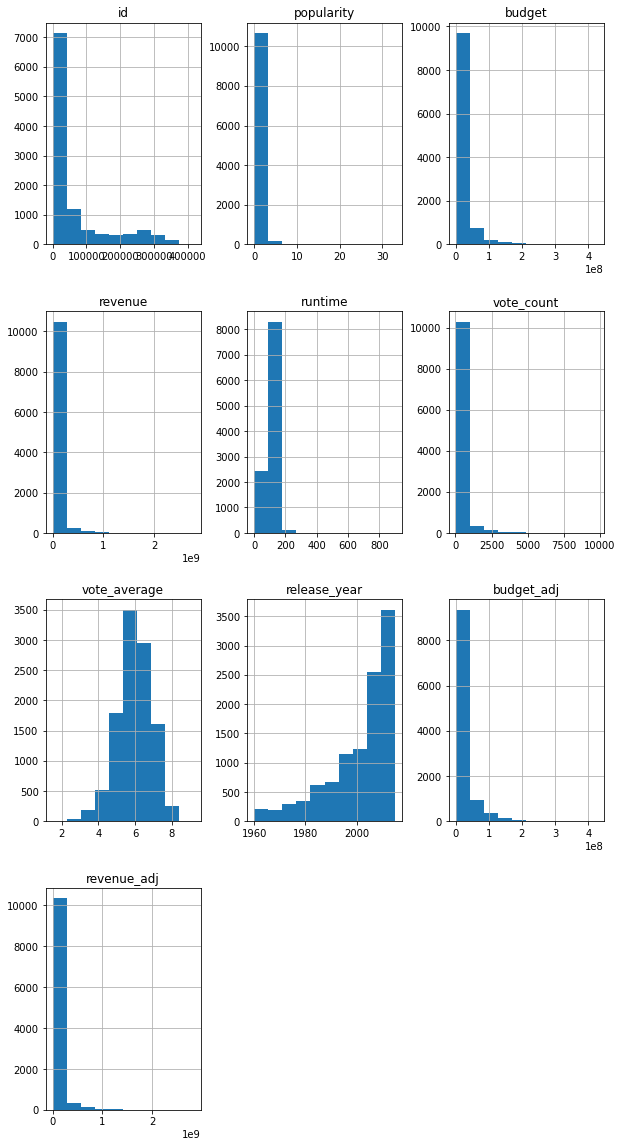

In [ ]:
#visualizing the data
data.hist(figsize = (10,20));

Dealing with missing data, but it works only with numbers and not all numbers 
from all these list we couldn't deal with it by the mean and so because it is not numbers imdb_id, cast, homepage, tagline, keywords, Production_companies

In [ ]:
#dropping the empty data
data.dropna(axis = 0, how = 'any', inplace = True)

In [ ]:
#drop the movies with 0 runtime 
data = data[data['runtime'] != 0]

In [ ]:
#drop the duplication
data.drop_duplicates(inplace = True)

In [ ]:
# confirm your correction with info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, Jurassic World to Hooper
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1990 non-null   int64  
 1   imdb_id               1990 non-null   object 
 2   popularity            1990 non-null   float64
 3   budget                1990 non-null   int64  
 4   revenue               1990 non-null   int64  
 5   cast                  1990 non-null   object 
 6   homepage              1990 non-null   object 
 7   director              1990 non-null   object 
 8   tagline               1990 non-null   object 
 9   keywords              1990 non-null   object 
 10  overview              1990 non-null   object 
 11  runtime               1990 non-null   int64  
 12  genres                1990 non-null   object 
 13  production_companies  1990 non-null   object 
 14  release_date          1990 non-null   object 
 15  vote_count 

### Removing the _adj from the last 2 cols putting BI as before inflation instead

In [ ]:
# remove "_adj" from column names
new_labels = []
for col in data.columns:
    if '_adj' in col:
        new_labels.append(col[:-5] + 'BI') # exclude last 6 characters
    else:
        new_labels.append(col)

# new labels for our columns
new_labels

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budgeBI',
 'revenuBI']

In [ ]:
#assign the new labels to the cols names of the datafrome 
data.columns = new_labels

<a id='eda'></a>
## Exploratory Data Analysis

Through this section we need to answer the following questions:
1. Do people prefer long or short movies?
2. Is it true that a movie costs more gets more money and do people like the costy movies more than the lower-cost ones?
3. which grene got me the best revenue?
4. Does winter make people tragedy while summer makes them happy? how does it affect my genre movie selection?


### Research Question 1: Do people prefer long or short movies?


To answer this question we need to plot the relation between rate and runtime. 


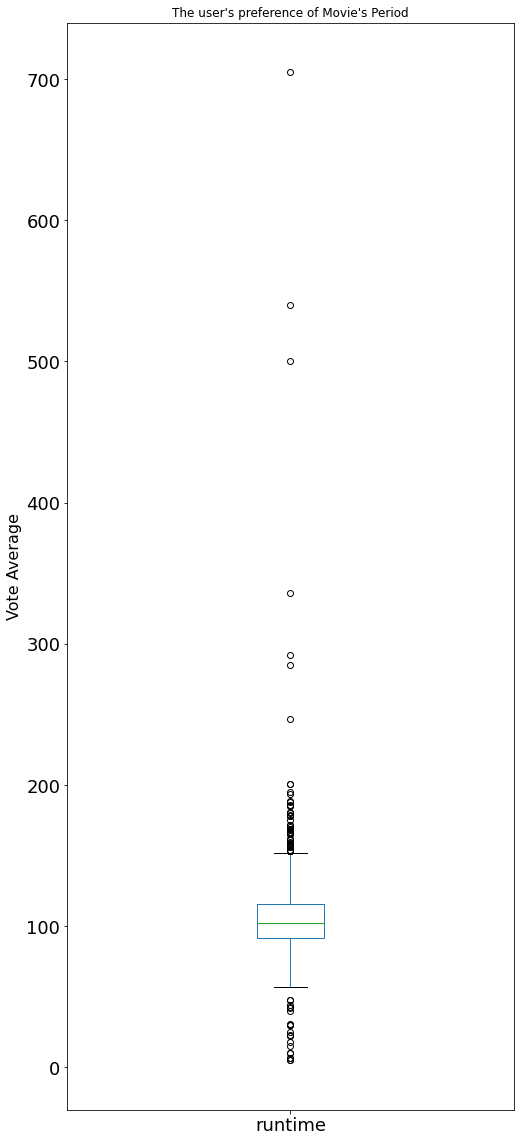

In [ ]:
data.plot(x ='vote_average', y='runtime',  kind = 'box', figsize= (8, 20), fontsize = 18, title = "The user's preference of Movie's Period"); #runtime in min and vote average from 0 to 10 
plt.ylabel("Vote Average", fontsize = 16); 


It tends to be positive around 100 minutes. People don't prefer long films instead they may like watching short ones. which means if I am a producer I should care more about average run-time movies more than the extreme long or short ones. 

### Research Question 2:  A film that costs more gets more money. 

To know that we need to discover the relationship between Budget and Revenue(after 2010)

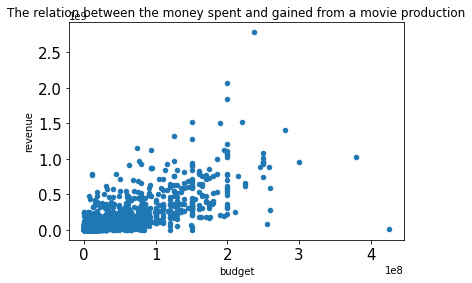

In [ ]:
data.plot(x ='budget', y='revenue',  kind = 'scatter', fontsize = 15, title = "The relation between the money spent and gained from a movie production"); #runtime in min and vote average from 0 to 10 

It also tends to be positive relationship which means as I pay more in producing the movie, I will get more money in the end. As a producer, I should put money and making sure they will be back as it will affect the locations, clothes and actors indeed. 

### Research Question 3:  which genre got the best revenue? 

to consider this questions we need to visualize the relations between revenue and genres. 

In [ ]:
average_rev = data[data['revenue'] > data['revenue'].quantile(0.99)]

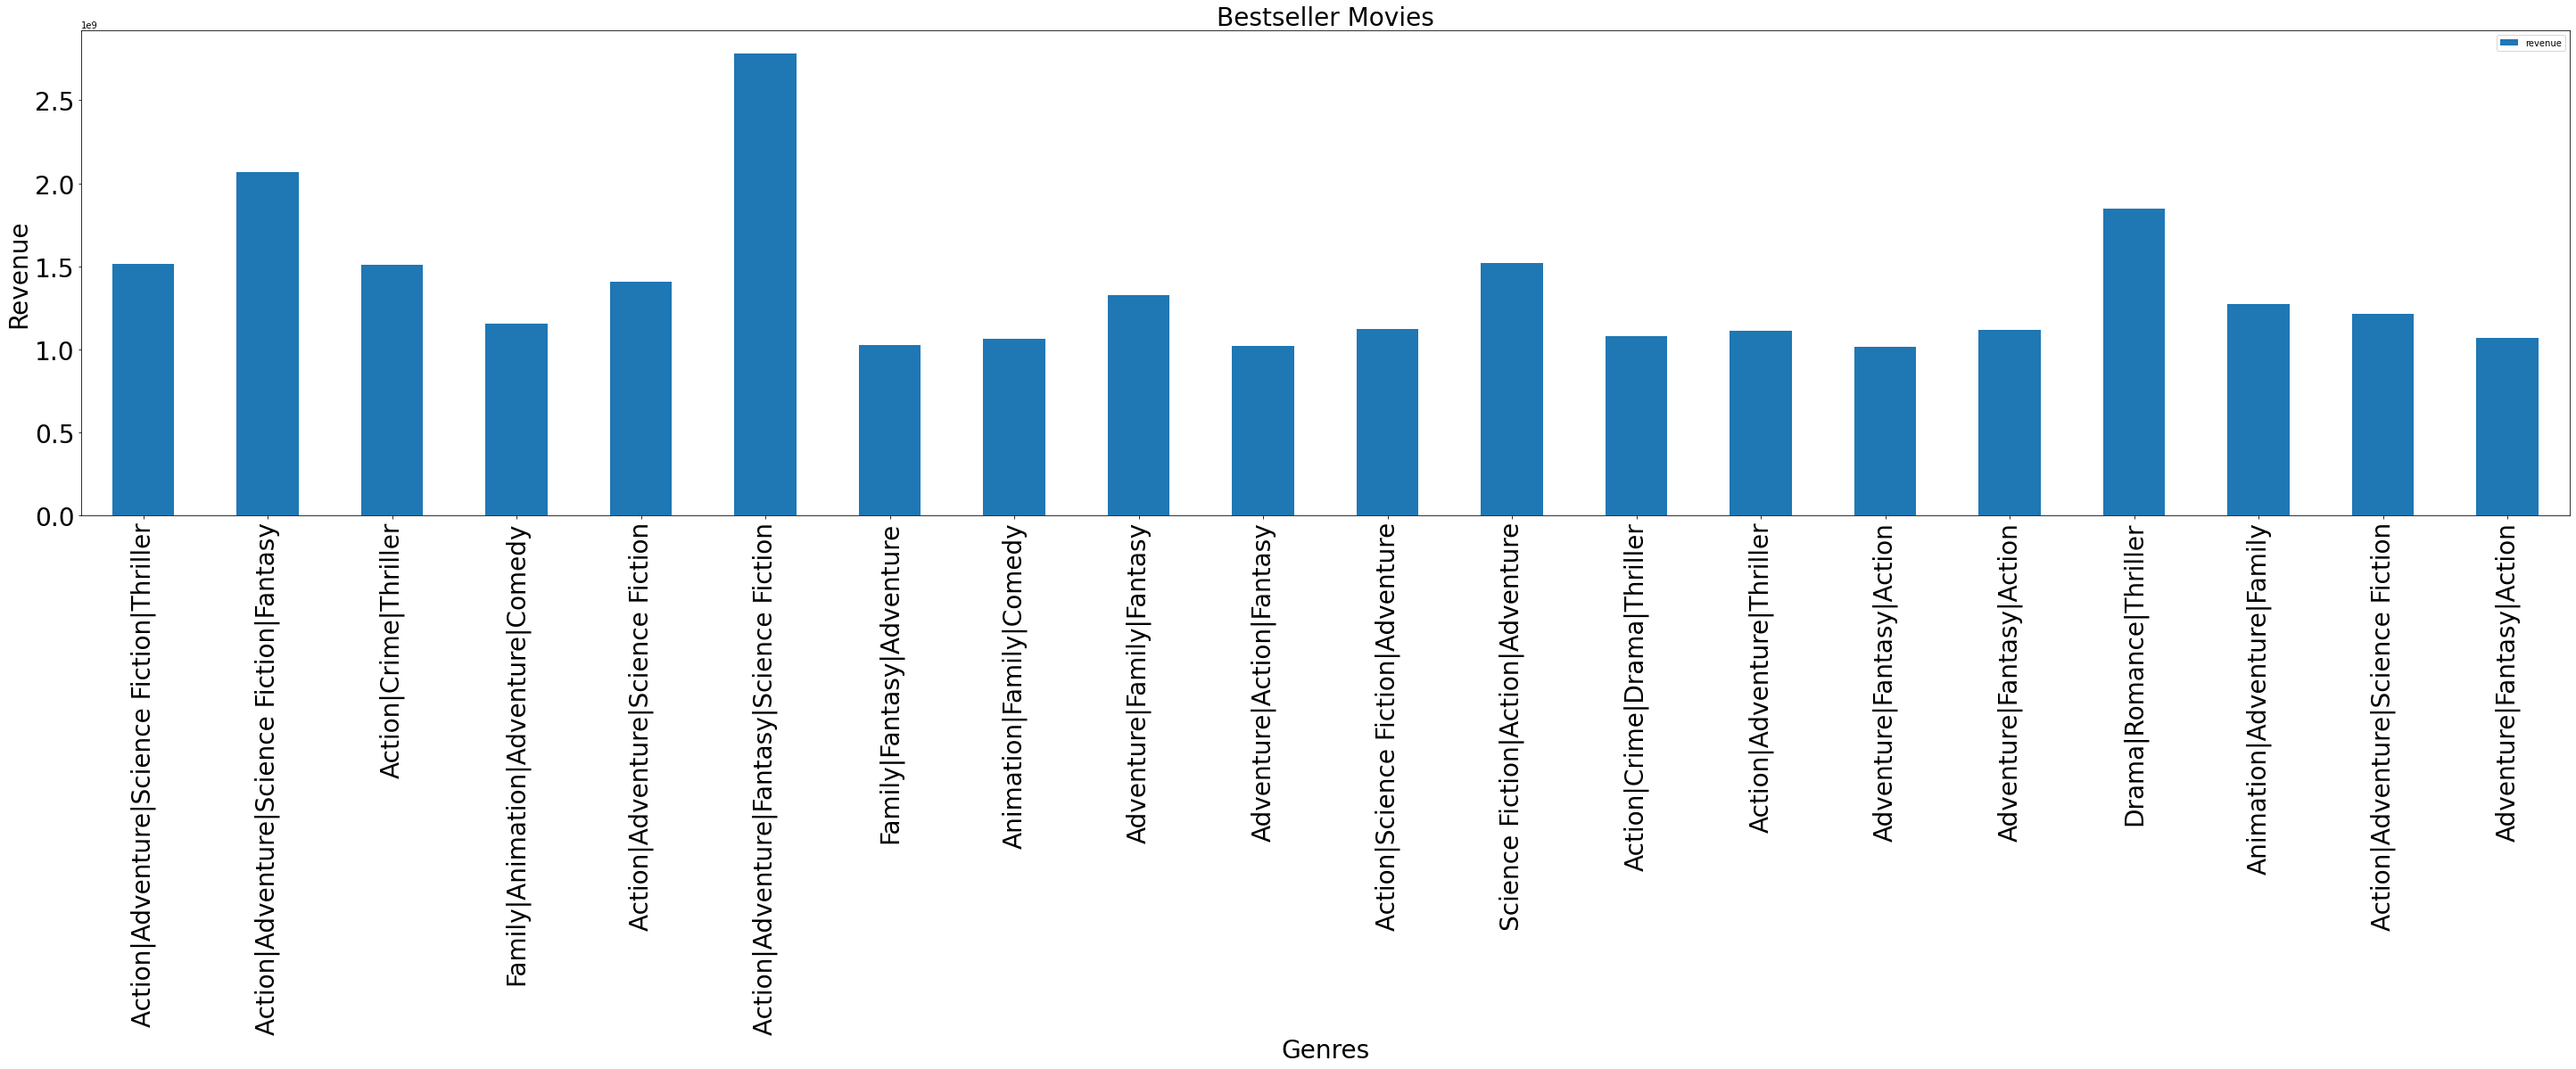

In [ ]:
average_rev.plot(x = 'genres', y = 'revenue', kind = 'bar', figsize = (50, 10), fontsize = 28);
plt.xlabel("Genres", fontsize = 28); 
plt.ylabel("Revenue", fontsize = 28);
plt.title("Bestseller Movies", fontsize = 28);

People prefer Action/Advanture/Fancy more than any other genre and it costs more for sure. If I am a producer I should care more about this genre and choose the best investment in it.

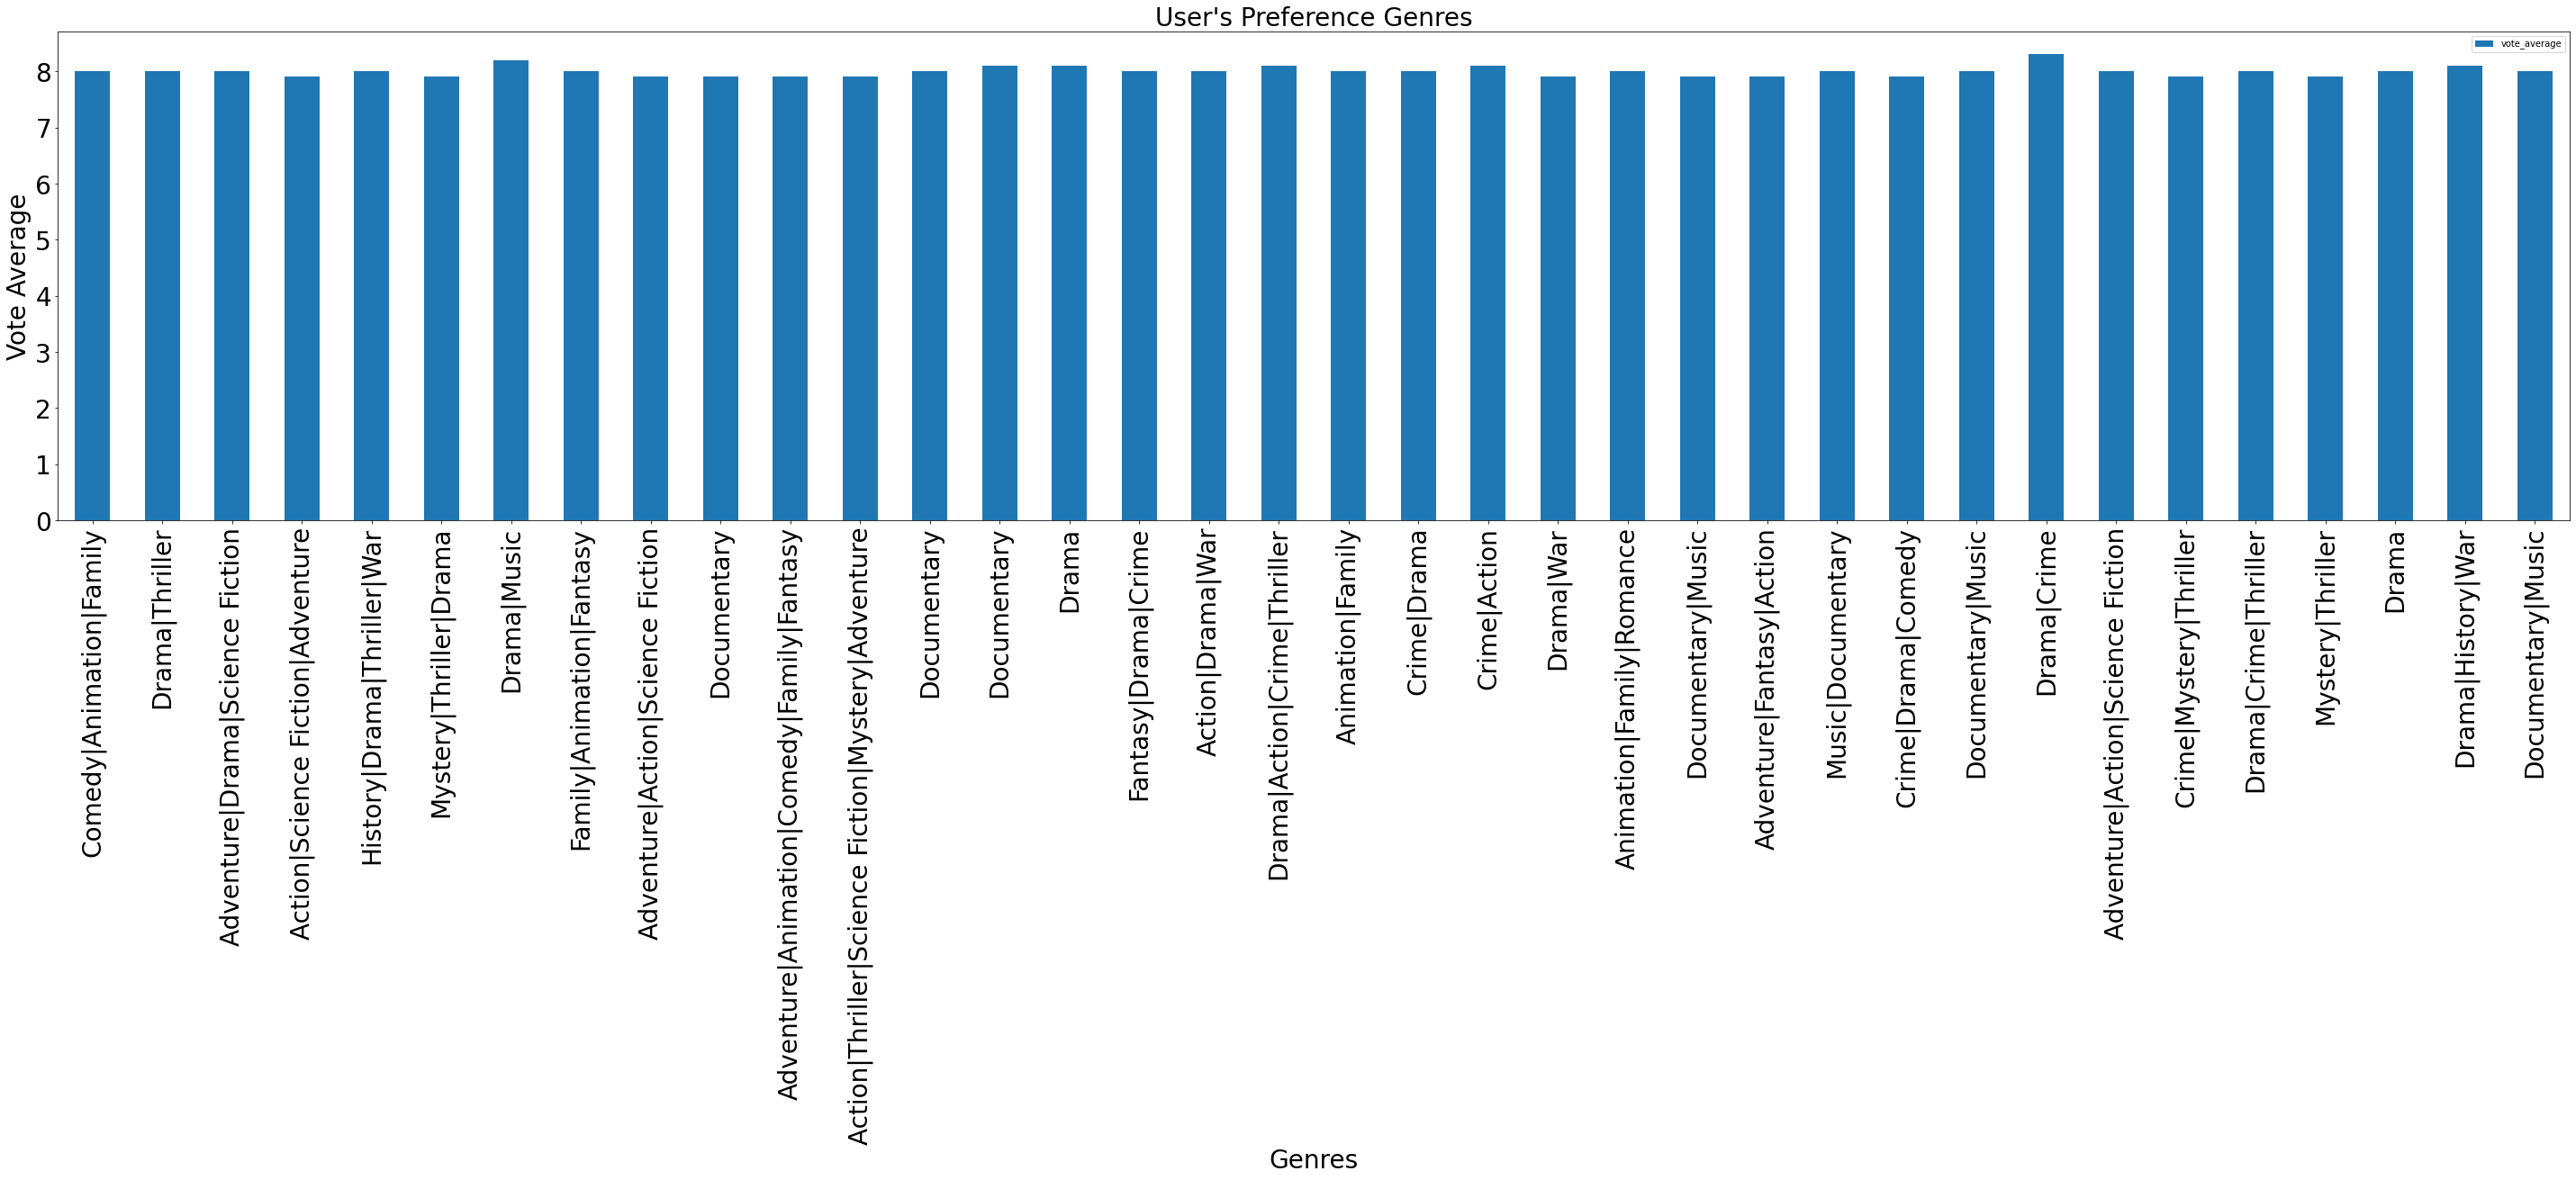

In [ ]:
best_rev = data[data['vote_average'] > data['vote_average'].quantile(0.98)]
best_rev.plot(x = 'genres', y = 'vote_average', kind = 'bar', figsize = (50, 10), fontsize = 28);
plt.xlabel("Genres", fontsize = 28); 
plt.ylabel("Vote Average", fontsize = 28);
plt.title("User's Preference Genres", fontsize = 28);

So obviously, Action/Advanture/Fancy in the best choice in the language of money and also people like it. I should pay attention and start planning for this genre for sure. 

### Research Question 4: How do seasons of the year affect poeple's mood? 

To answer this question we need to focus on one or two season, such as Winter and Summer and see which movie types are more watched in these seasons. The data is international and the seasons change from area to area, then we will only consider the winter in America/Europe and see which types people prefer more. This is not accurate, too. Because the population in this data doesn't mean to be in the same month of the movie's releasing date. That is why I will consider the producers were really intelligent and knew more about people mood and then, they produce their movies according to it.

Winter runs from December 1 to February 28. 

In [ ]:
winter_mo= data[data['release_date'] < '2/28'] #movie_15 is a dataframe for movies released in 2015 only 
winter_mo= winter_mo[winter_mo['release_date'] > '12/1']

In [ ]:
#let's take average rate of these movies 
average_rate_winter = winter_mo['vote_average'].mean()
average_rate_winter

6.2996031746031775

The average rating is so close to the average overall rate. Now let's know more about the above average categories. 

In [ ]:
gen_above_average = winter_mo[winter_mo['vote_average'] > average_rate_winter]['genres'][1]
gen_above_average

'Western|Drama|Adventure|Thriller'

'Western|Drama|Adventure|Thriller' are the most common movie's genres in Winter. Winter is meant to be the Drama season really. 

<a id='conclusions'></a>
## Conclusions

After working on the data we conclude that people like to watch and vote higher for short or not long movies. The more money I will put, The more income I will get from the movie. Action/Advanture/Fancy in the best choice in the language of money and also people like it. People tend to feel more sadly and lonely in winter. 


### Limitations


In the fouth question, I built my exploration on three claims. First, the data follows only American/Europe year seasons. Second, movies have been released according to people or country mood. Third, people watch and vote for movies in the same season and not in different season. 

The data included around 10866 movies which is not really a big dataset. It could not be a good representation of the population. There were not a lot missing values and the data wasn't independent, then it wouldn't be a huge difference. The comparison between the different genre will give a small indication about the season's general mood, the variation in voting and preference for customers.  

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])